In [1]:
import numpy as np
import scipy
from scipy.ndimage import gaussian_filter1d
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp
import change_point_post_analysis as cppa
import place_field_analysis as pf
import pingouin as pg
import trial_correlates as tc
import tqdm
import misc

import switch_analysis_one_session as saos
reload(saos)

reload(misc)
import nmf_sweep_error as nse
from collections import OrderedDict

67 sessions!
67 sessions!
<module 'sys' (built-in)>


In [2]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/cosyne'

db_sorted = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
data_dir_full = db_sorted['data_dir_full'][0]

In [3]:
SMALL_SIZE = 15
MEDIUM_SIZE = 25
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



# load switch res

In [4]:
res_to_save_data_detection_l=pickle.load(open(os.path.join('/mnt/home/szheng/ceph/place_variability/data','switch_res_allromsess_highrepeats_swmag0dot4.p'),'rb'))
plt.close('all')
sess_selected = db_sorted.loc[db_sorted['n_pyr_putative'] >= 50,'sess_name']
switch_detection_res_allsess = cppa.reshape_switch_detection_result_all_sess(res_to_save_data_detection_l,sess_selected)

# switch_detection_res_allsess = saos.load_switch_analysis_res_allsess(save_fn_one='shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p'
#     ,force_reload=False,dosave=True,load_only=False,n_pyr_thresh=50)





/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:37: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
/mnt/home/szheng/projects/nmf_analysis/change_point_post_analysis.py:37: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_re

# load field

In [5]:
%%time
reload(pf)
place_field_res_l = OrderedDict()
for ii in tqdm.tqdm(range(len(db_sorted['data_dir_full']))):
    ddf = db_sorted['data_dir_full'][ii]
    pf_res =pf.field_detection_both_avg_trial_wrapper(ddf, dosave=True,force_reload=False,nbins = 100, 
                                        save_fn = 'place_field_avg_and_trial_vthresh.p', 
                                        shuffle_fn='fr_map_null_trialtype_vthresh.p',
                                        smth_in_bin=2.5, speed_thresh=1.,speed_key='v',load_only=True
                                        )
    ani = db_sorted.iloc[ii]['animal_name.1']
    sess = db_sorted.iloc[ii]['sess_name']
    place_field_res_l[ani,sess] = pf_res
    

  1%|▏         | 1/67 [00:00<00:10,  6.39it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


  6%|▌         | 4/67 [00:00<00:08,  7.02it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


  9%|▉         | 6/67 [00:00<00:08,  7.53it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 15%|█▍        | 10/67 [00:01<00:05, 10.28it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210111/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 22%|██▏       | 15/67 [00:01<00:03, 15.06it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211211/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210203/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211210/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 31%|███▏      | 21/67 [00:01<00:02, 18.62it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211124/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210331/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 37%|███▋      | 25/67 [00:01<00:02, 17.59it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200809/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 40%|████      | 27/67 [00:02<00:03, 13.16it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200809/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200812/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210314/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200729/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 49%|████▉     | 33/67 [00:02<00:01, 17.53it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210319/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210315/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210322/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201002/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200723/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 61%|██████    | 41/67 [00:02<00:01, 24.14it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200716/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200920/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200723/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201129/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201125/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 66%|██████▌   | 44/67 [00:02<00:00, 24.24it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201129/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201206/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200917/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 75%|███████▍  | 50/67 [00:03<00:00, 18.29it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200918/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200719/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 79%|███████▉  | 53/67 [00:03<00:00, 17.77it/s]

/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201206/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200923/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200720/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 90%|████████▉ | 60/67 [00:03<00:00, 23.45it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201121/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201001/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200717/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200715/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201121/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200823/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


100%|██████████| 67/67 [00:03<00:00, 17.81it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200824/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
CPU times: user 715 ms, sys: 89 ms, total: 804 ms
Wall time: 3.77 s


# load instability

In [6]:
import test_contiguous_instability as tsi

<module 'sys' (built-in)>


In [7]:
%%time
db_sorted_filt = db_sorted.loc[db_sorted['n_pyr_putative']>50]
data_dir_and_sess=list(db_sorted_filt[['data_dir_full','animal_name.1','sess_name']].itertuples(index=False,name=None))
save_fn = 'shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p'#'shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean.p'
# for ddf, sess in data_dir_and_sess:
instability_res_l = OrderedDict()
instability_ratio_l = OrderedDict()
for ddf,ani, sess in data_dir_and_sess:
    try:
        instability_res_l[(ani,sess)] = tsi.test_contiguous_instability(ddf,force_reload=False,load_only=True)
        instability_ratio_l[(ani,sess)] = instability_res_l[(ani,sess)]['ratio_d']
    except:
        pass
instability_ratio_l = pd.DataFrame(instability_ratio_l).T # one task type!
# pickle.dump(res_to_save_data_detection_l, open(os.path.join('/mnt/home/szheng/ceph/place_variability/data','switch_res_allromsess_highrepeats_swmag0dot4.p'),'wb'))


/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/instability/contiguous_instability_avg.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_d

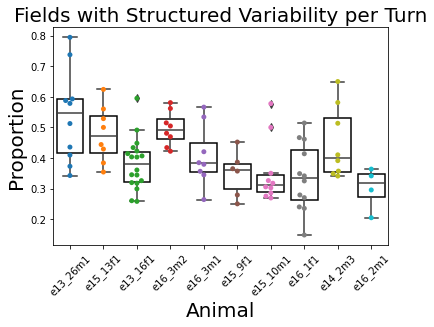

In [122]:
# distribution of instability ratio within each animal
instability_ratio_l_for_plot = instability_ratio_l[0].reset_index().melt(id_vars=['level_0','level_1'], value_vars=[0,1])
ax=sns.boxplot(data=instability_ratio_l_for_plot,x='level_0',y='value',boxprops={'facecolor':'none', 'edgecolor':'black'},)
ax=sns.swarmplot(data=instability_ratio_l_for_plot,x='level_0',y='value',ax=ax)

ax.tick_params(axis='x', labelrotation = 45)
ax.set(xlabel='Animal',ylabel='Proportion',title='Fields with Structured Variability per Turn')
fig=ax.figure
fig.savefig(os.path.join(figdir,'instability_per_animal.pdf'),bbox_inches='tight')

# load pairwise test

In [8]:
import pairwise_shareonoff_test as pst

67 sessions!


In [9]:
%%time
reload(pf)
pst_res_l = OrderedDict()
pst_res_l_selected = OrderedDict()
for ii in tqdm.tqdm(range(len(db_sorted['data_dir_full']))):
    ddf = db_sorted['data_dir_full'][ii]
#     pf_res =pf.field_detection_both_avg_trial_wrapper(ddf, dosave=True,force_reload=False,nbins = 100, 
#                                         save_fn = 'place_field_avg_and_trial_vthresh.p', 
#                                         shuffle_fn='fr_map_null_trialtype_vthresh.p',
#                                         smth_in_bin=2.5, speed_thresh=1.,speed_key='v',load_only=True
#                                         )
    pst_res=pst.pairwise_shareonoff_test_one_session(ddf,pst.SW_RES_FN, save_fn=pst.SAVE_FN,dosave=False,force_reload=False,
                                        nrepeats=100,load_only=True
                                        )
    ani = db_sorted.iloc[ii]['animal_name.1']
    sess = db_sorted.iloc[ii]['sess_name']
    pst_res_l[ani,sess] = pst_res
    if pst_res is not None:
        pst_res_l_selected[ani,sess] = pst_res['avg'].loc[(slice(None),slice(None),0.3,'switch_magnitude',0.4),:]
    

  6%|▌         | 4/67 [00:00<00:02, 25.07it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---


 10%|█         | 7/67 [00:00<00:03, 18.15it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---


 18%|█▊        | 12/67 [00:00<00:02, 18.92it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210111/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211211/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210203/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loadin

 31%|███▏      | 21/67 [00:00<00:01, 25.21it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211119/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211124/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210331/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210119/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; 

 43%|████▎     | 29/67 [00:01<00:01, 30.37it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200809/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200809/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200812/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210314/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists

 58%|█████▊    | 39/67 [00:01<00:00, 35.47it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210322/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201002/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200723/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200716/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; 

 64%|██████▍   | 43/67 [00:01<00:00, 33.83it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200920/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200723/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201129/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201125/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201129/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loadin

 81%|████████  | 54/67 [00:01<00:00, 39.12it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200719/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201206/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200923/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200720/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; load

100%|██████████| 67/67 [00:01<00:00, 34.23it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200715/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201121/py_data/switch_analysis/pairwise_test_shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---
CPU times: user 223 ms, sys: 14.2 ms, total: 237 ms
Wall time: 1.96 s


In [10]:
pst_res_l_selected_df = pd.concat(pst_res_l_selected,axis=0).droplevel((-1,-2,-3))

# distribution across trials

In [11]:
%%time
# distribution of field
detection='avg'
gpb = switch_detection_res_allsess[detection]['changes_df'].groupby(level=(0,1,2,3,4,5,6))
coswitching_coms_binned_l = {}
field_loc_histogram_l = {}
coswitching_coms_binned_ratio_l = {}
coswitching_per_trial_ratio_l = {}
for ind,changes in gpb:
    changes = changes.dropna(axis=1).droplevel((0,1,2,3,4,5,6))
    ani,sess,ti,tt,pen,sw_def,thresh = ind
    inds_d = cpa.get_inds_switch_sametrial_sorted(changes)
    all_fields = place_field_res_l[ani,sess][detection]['all_fields'][ti,tt]
    coswitching_coms,coswitching_coms_binned,field_loc_histogram,coswitching_coms_binned_ratio,coswitching_per_trial_ratio = cpa.get_switching_com_distribution_per_trial(all_fields,inds_d, field_loc_key='com',coarse_bins=np.arange(0,101,10))
    coswitching_coms_binned_l[ind] = coswitching_coms_binned.T
    field_loc_histogram_l[ind] = pd.Series(field_loc_histogram)
    coswitching_coms_binned_ratio_l[ind] = coswitching_coms_binned_ratio.T
    coswitching_per_trial_ratio_l[ind]=coswitching_per_trial_ratio.T
coswitching_coms_binned_l = pd.concat(coswitching_coms_binned_l,axis=0)
field_loc_histogram_l = pd.concat(field_loc_histogram_l,axis=0)
coswitching_coms_binned_ratio_l = pd.concat(coswitching_coms_binned_ratio_l,axis=0)
coswitching_per_trial_ratio_l = pd.concat(coswitching_per_trial_ratio_l,axis=0)





CPU times: user 5.05 s, sys: 0 ns, total: 5.05 s
Wall time: 5.04 s


In [12]:
coswitching_per_trial_ratio_l_df = coswitching_per_trial_ratio_l.unstack(level=-2).reset_index()
coswitching_per_trial_ratio_l_df.columns = ['animal','session','task','trialtype','penalty','sw_def','threshold','trial','off','on']

coswitching_per_trial_ratio_l_df=coswitching_per_trial_ratio_l_df.fillna(0)

In [13]:
df=coswitching_per_trial_ratio_l_df.set_index(['penalty','threshold']).loc[0.3,0.4].reset_index()
ntrialbins = 10
df['trial_binned'] = df.groupby(['session','task','trialtype']).apply(lambda x:pd.cut(x['trial'],ntrialbins,labels=False)).values
df['diff'] = df['on'] - df['off']



/tmp/ipykernel_1789282/1786548659.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df=coswitching_per_trial_ratio_l_df.set_index(['penalty','threshold']).loc[0.3,0.4].reset_index()


In [14]:
inds=['trial','trial_binned','on','off','diff']
rmat = df.rcorr(stars=False).loc[inds,inds]

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [39]:
rmat

,trial,trial_binned,on,off,diff
trial,-,0.000,0.000,0.000,0.246
trial_binned,0.72,-,-0.109,-0.223,0.023
on,-0.241,0.000,-,0.074,0.000
off,-0.221,0.000,0.014,-,0.000
diff,-0.035,0.069,0.727,-0.631,-


In [19]:
def get_beta_credible_interval(data,alpha=0.05,a=1,b=1):
    low = alpha / 2
    high = 1-alpha/2
    data = data.astype(bool)
    a_data = data.sum()
    b_data = (~data).sum()
    interval = scipy.stats.beta.ppf([low,high],a+a_data,b+b_data)
    return interval
    

sig_allsess = switch_detection_res_allsess['avg']['sig_pos'].loc[(slice(None),slice(None),slice(None),slice(None),0.3),:].droplevel((-1,-2,-3))
anysig_pairwise_allsess=pst_res_l_selected_df['issig'][['on','off']]
anysig_allsess= sig_allsess.groupby(axis=1,level=0).apply(lambda x:x.any(axis=1))
mean = anysig_allsess.mean()
interval =anysig_allsess.apply(get_beta_credible_interval,axis=0)
mean_pairwise = anysig_pairwise_allsess.mean()
interval_pairwise = anysig_pairwise_allsess.apply(get_beta_credible_interval,axis=0)


def plot_trial_pairwise_sig_frac_sess(ax=None):
    anysig_pairwise_allsess=pst_res_l_selected_df['issig'][['on','off']]

    mean = anysig_allsess.mean()
    interval =anysig_allsess.apply(get_beta_credible_interval,axis=0)

    mean_pairwise = anysig_pairwise_allsess.mean()
    interval_pairwise = anysig_pairwise_allsess.apply(get_beta_credible_interval,axis=0)

    frac_df=pd.DataFrame({'trial':mean,'pairwise':mean_pairwise})
    # .plot.bar()

    interval_d = {'trial':interval,'pairwise':interval_pairwise}

    err = np.zeros((2,2,2))
    for tt,t in enumerate(frac_df.columns):
        for oo,o in enumerate(frac_df.index):

            err[oo,0,tt]=np.abs(interval_d[t][o].loc[0] - frac_df[t].loc[o])
            err[oo,1,tt]=np.abs(interval_d[t][o].loc[1] - frac_df[t].loc[o])

    ax=frac_df.plot.bar(yerr=err,ax=ax)
    ax.set(title='Sessions with Significant Co-switching',ylabel='Fraction',xlabel='Type of Switching',xticklabels=['OFF','ON'])
    ax.legend(['Per Trial Test','Pairwise Test'],loc='upper center')
    return ax.figure,ax

# fig,ax=plot_trial_pairwise_sig_frac_sess()


In [20]:
mean

off    0.148936
on     0.212766
dtype: float64

In [17]:
interval

,off,on
0,0.091153,0.142347
1,0.234882,0.306242


In [21]:
mean_pairwise

on     0.36
off    0.38
dtype: float64

In [22]:
interval_pairwise

,on,off
0,0.272665,0.290905
1,0.457925,0.478172


In [34]:
df['on'].mean()

0.031846116524550085

In [35]:
df['off'].mean()

0.023820248734715388

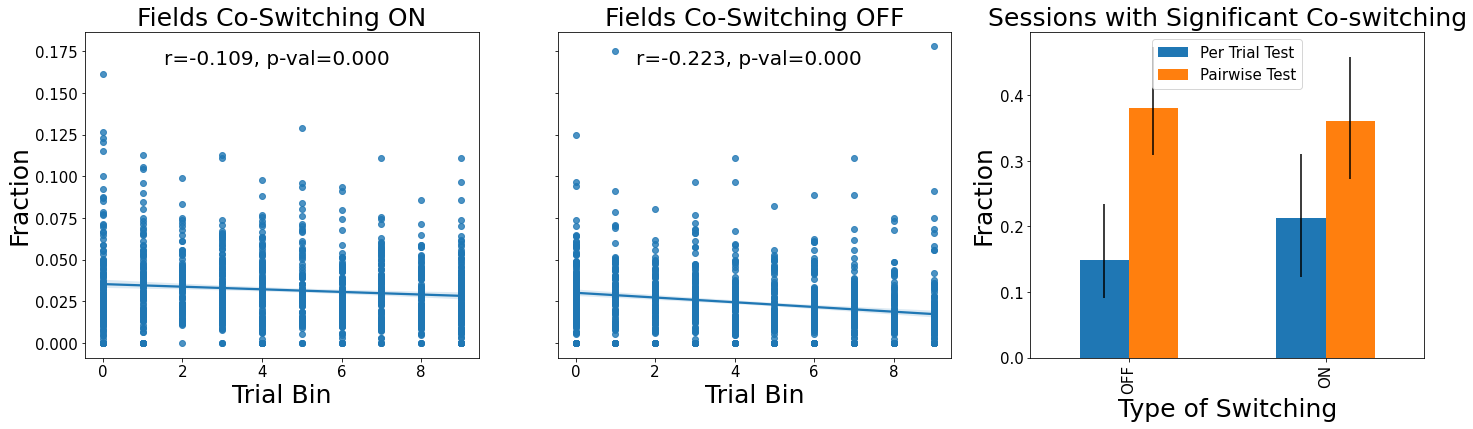

In [162]:
fig,axs=plt.subplots(1,3,figsize=(8*3,6))
axs[0].sharex(axs[1])
axs[0].sharey(axs[1])
for ii,onoff_str in enumerate(['on','off']):
    ax = axs[ii]
    ax=sns.regplot(data=df,x='trial_binned',y=onoff_str,ax=ax)
    ax.set(xlabel="Trial Bin",ylabel="Fraction",title=f"Fields Co-Switching {onoff_str.upper()}")
    r =rmat.loc['trial_binned',onoff_str]
    pval=rmat.loc[onoff_str,'trial_binned']
    ax.text(0.2,0.9,f'r={r}, p-val={pval}',transform=ax.transAxes,fontsize=20)
ax = axs[2]
fig,ax=plot_trial_pairwise_sig_frac_sess(ax=ax)
fig.savefig(os.path.join(figdir,'co_switching_across_trial_and_agg.pdf'),bbox_inches='tight')

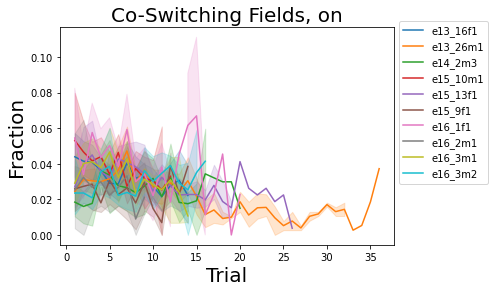

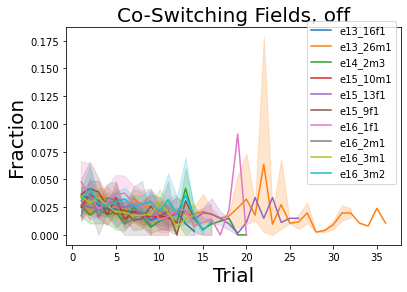

In [82]:
for onoff_str in ['on','off']:
    plt.figure()
    ax=sns.lineplot(data=df,x='trial',y=onoff_str,hue='animal')
    ax.legend(bbox_to_anchor=[1,1.05])
    ax.set(title=f'Co-Switching Fields, {onoff_str}',ylabel='Fraction',xlabel='Trial')
    fig=ax.figure
    fig.savefig(os.path.join(figdir,f'{onoff_str}_ratio_across_trial_per_ani.pdf'),bbox_inches='tight')

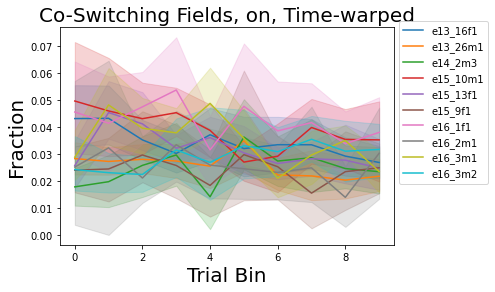

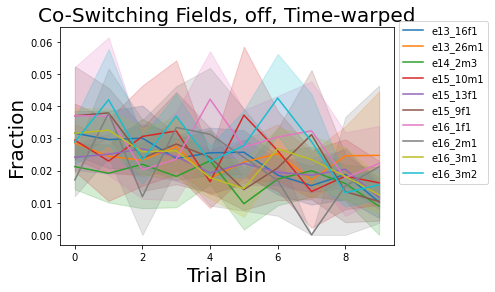

In [83]:
from matplotlib.ticker import MaxNLocator

for onoff_str in ['on','off']:
    plt.figure()
    ax=sns.lineplot(data=df,x='trial_binned',y=onoff_str,hue='animal')
    ax.legend(bbox_to_anchor=[1,1.05])
    ax.set(title=f'Co-Switching Fields, {onoff_str}, Time-warped',ylabel='Fraction',xlabel='Trial Bin')
    fig=ax.figure
    fig.savefig(os.path.join(figdir,f'{onoff_str}_ratio_across_trial_per_ani_timewarped.pdf'),bbox_inches='tight')

In [117]:
inds=['trial','trial_binned','on','off']
df.rcorr().loc[inds,inds]

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,trial,trial_binned,on,off
trial,-,***,***,***
trial_binned,0.72,-,-0.109,-0.223
on,-0.241,***,-,0.074
off,-0.221,***,*,-


# load nmf res

In [43]:
%%time

data_dir_and_sess=list(db_sorted[['data_dir_full','animal_name.1','sess_name']].itertuples(index=False,name=None))
save_fn = 'shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p'#'shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean.p'
# for ddf, sess in data_dir_and_sess:
nmf_error_l = OrderedDict()
nmf_error_diff_l = OrderedDict()
for ddf,ani, sess in data_dir_and_sess:
    try:
        nmf_error_l[(ani,sess)] = nse.nmf_sweep_error(ddf,detection='avg',force_reload=False,save_fn='nmf_sweep_error_shuffle.p',load_only=True,do_plot=False)
        nmf_error_diff_l[(ani,sess)] = nmf_error_l[(ani,sess)]['err_difference']
    except:
        pass
nmf_err_diff_l = pd.DataFrame(nmf_error_diff_l).T # one task type!
# pickle.dump(res_to_save_data_detection_l, open(os.path.join('/mnt/home/szheng/ceph/place_variability/data','switch_res_allromsess_highrepeats_swmag0dot4.p'),'wb'))
plt.close('all')

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/nmf_error/nmf_sweep_error_shuffle.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/nmf_error/nmf_sweep_error_shuffle.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/nmf_error/nmf_sweep_error_shuffle.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/nmf_error/nmf_sweep_error_shuffle.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/nmf_error/nmf_sweep_error_shuffle.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/nmf_error/nmf_sweep_error_shuffle.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/nmf_error/nmf_sweep_error_shuffle.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/nmf_error/nmf_sweep_error_shuff

In [36]:
nmf_err_diff_l = nmf_err_diff_l.stack(level=(0,1))

e13_26m1  e13_26m1_210913  0  0.0    0.018155
                              1.0    0.017274
e15_13f1  e15_13f1_220117  0  0.0    0.023843
                              1.0    0.019585
          e15_13f1_220118  0  0.0    0.012397
                                       ...   
e14_2m3   e14_2m3_201121   0  1.0    0.003397
e16_1f1   e16_1f1_200823   0  0.0    0.010239
                              1.0    0.029249
          e16_1f1_200824   0  0.0    0.025369
                              1.0    0.035726
Length: 124, dtype: float64

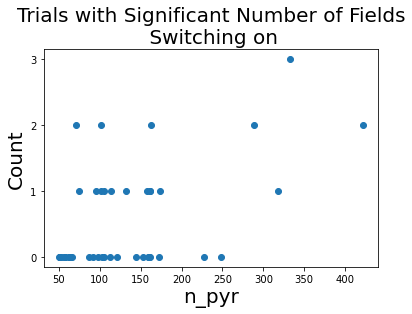

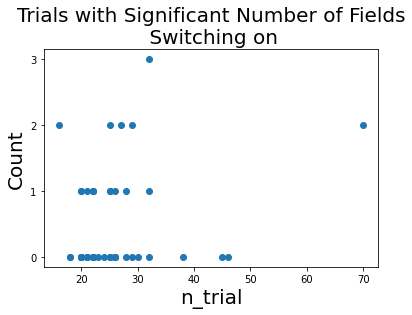

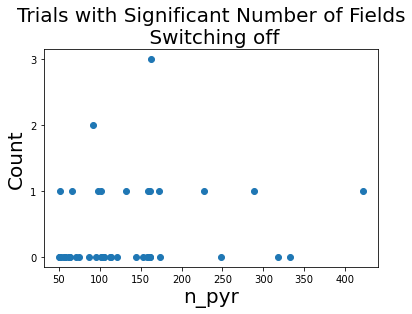

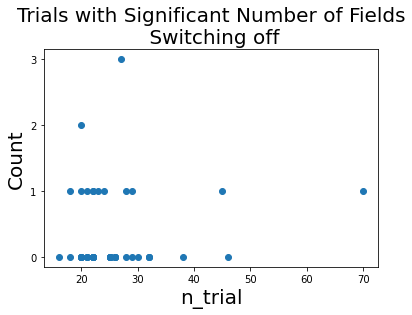

In [112]:
reload(cppa)
from matplotlib.ticker import MaxNLocator
n_sig_trial_meta_df_d = {}
for onoff_str in ['on','off']:
    for meta_key in ['n_pyr','n_trial']:
        fig,ax,n_sig_trial_meta_df_d[onoff_str]=cppa.plot_n_sig_trials_and_meta_data(switch_detection_res_allsess,db_sorted,meta_key,onoff_str=onoff_str,detection='avg',n_sig_trial_meta_df=None,sw_ind=(0.4,'switch_magnitude',0.3),
                                        fig=None,ax=None,split_trialtype=False
        )
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set(xlabel=meta_key,title=f'Trials with Significant Number of Fields\n Switching {onoff_str}',ylabel='Count')

        fig=ax.figure
        fig.savefig(os.path.join(figdir,f'n_sig_trial_per_sess_vs_{meta_key}_{onoff_str}.pdf'),bbox_inches='tight')
    
    

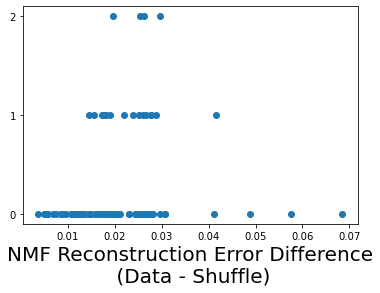

In [46]:
n_sig_trial_meta_df['nmf_err_diff'] = nmf_err_diff_l.stack(level=(0,1)).loc[n_sig_trial_meta_df.index]


fig,ax=plt.subplots()
ax.scatter(n_sig_trial_meta_df['nmf_err_diff'],n_sig_trial_meta_df['on',0.4,'switch_magnitude',0.3])
ax.set_xlabel('NMF Reconstruction Error Difference\n (Data - Shuffle)')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [80]:
n_sig_trial_meta_df_d['on']

off                   on     n_pyr  \
                                        0.4                  0.4             
                           switch_magnitude     switch_magnitude             
                                        raw 0.3              raw 0.3         
e13_16f1 e13_16f1_210302 0                0   0                1   1   114   
         e13_16f1_210312 0                0   0                1   0   105   
         e13_16f1_210314 0                0   0                3   2   102   
         e13_16f1_210315 0                0   2                0   0    92   
         e13_16f1_210317 0                1   0                2   0   112   
         e13_16f1_210319 0                0   0                1   1    95   
         e13_16f1_210322 0                0   0                1   0    87   
         e13_16f1_210328 0                2   0                1   1   174   
         e13_16f1_210331 0                1   1                0   1   132   
e13_26m1 e13_26m1_210913 0                2   1                3   2   422   
         e13_26m1_211019 0                2   1                1   0   228   
         e13_26m1_211116 0                0   1                0   0   173   
         e13_26m1_211119 0                0   0                0   1   158   
         e13_26m1_211124 0                1   0                0   0   153   
e14_2m3  e14_2m3_201125  0                0   0                1   0    57   
         e14_2m3_201129  0                0   0                1   0    57   
         e14_2m3_201206  0                1   0                0   0    52   
         e14_2m3_201208  0                0   0                1   0    52   
e15_10m1 e15_10m1_200716 0                0   0                1   0    64   
         e15_10m1_200719 0                1   0                2   0    52   
         e15_10m1_200723 0                0   0                2   2    71   
         e15_10m1_200809 0                1   0                1   0   103   
         e15_10m1_200812 0                1   1                1   1   102   
e15_13f1 e15_13f1_220117 0                2   0                3   3   333   
         e15_13f1_220118 0                2   0                2   1   318   
         e15_13f1_220119 0                2   1                4   2   288   
         e15_13f1_220120 0                2   0                1   0   248   
e15_9f1  e15_9f1_200723  0                0   0                0   0    62   
         e15_9f1_200729  0                1   1                2   0    98   
         e15_9f1_200809  0                1   0                2   1   105   
e16_1f1  e16_1f1_200917  0                0   1                2   0    52   
         e16_1f1_200918  0                0   0                0   0    52   
         e16_1f1_200919  0                0   0                0   0    52   
         e16_1f1_200920  0                0   0                0   0    62   
         e16_1f1_200923  0                1   0                2   0    50   
         e16_1f1_201002  0                2   0                0   1    75   
         e16_1f1_201004  0                1   1                0   0    66   
e16_2m1  e16_2m1_201129  0                1   0                1   0    57   
         e16_2m1_201206  0                0   0                2   0    56   
e16_3m1  e16_3m1_210111  0                1   1                3   0   162   
         e16_3m1_210119  0                0   0                0   0   121   
         e16_3m1_210201  0                0   0                1   0   144   
         e16_3m1_210203  0                0   0                1   0   160   
e16_3m2  e16_3m2_211210  0                0   1                1   0   159   
         e16_3m2_211211  0                0   0                0   1   161   
         e16_3m2_211212  0                1   0                1   1   162   
         e16_3m2_211213  0                1   3                1   2   163   

                           n_trial  
                        

# switch sess per ani

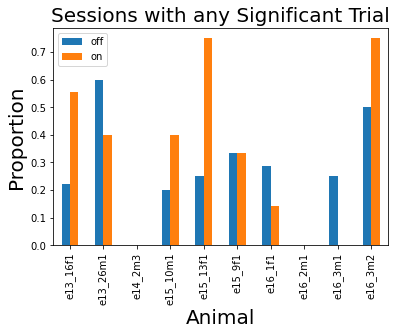

In [120]:
anysigsess=(n_sig_trial_meta_df_d['on'].loc[:,(slice(None),0.4,'switch_magnitude',0.3)] > 0)
ax=anysigsess.groupby(level=(0)).mean().plot.bar()
legend = anysigsess.groupby(level=(0)).mean().columns.get_level_values(0).unique()
ax.legend(legend)
ax.set(xlabel='Animal',title='Sessions with any Significant Trial',ylabel='Proportion')
fig=ax.figure
fig.savefig(os.path.join(figdir,f'sess_with_any_sig_trial_per_ani.pdf'),bbox_inches='tight')

# residual n_sig_trial!

In [35]:
switch_detection_res_allsess_resid = saos.load_switch_analysis_res_allsess(save_fn_one='resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p'
    ,force_reload=False,dosave=True,load_only=True,n_pyr_thresh=50)




/mnt/home/szheng/ceph/place_variability/data/all_resid_switch_res_switch_magnitude_only_fr_mean_highrepeats.p exists; loading---


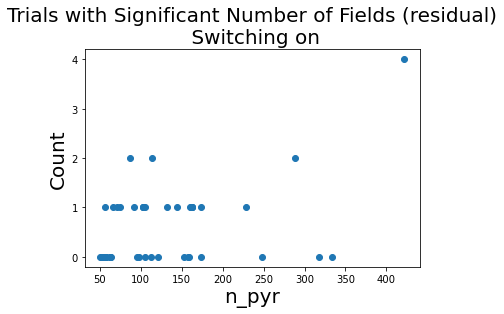

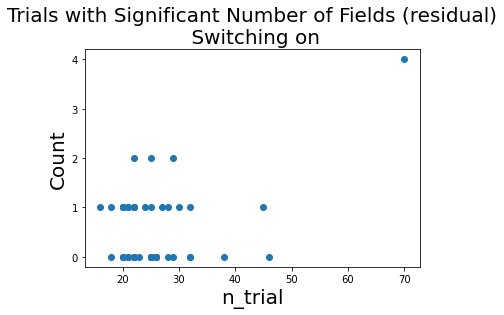

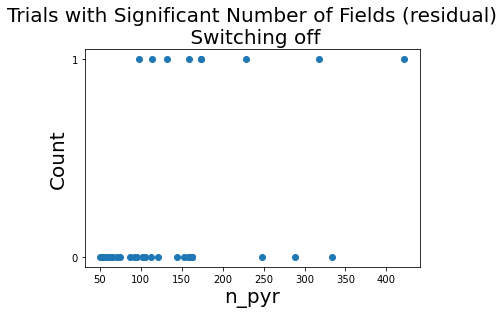

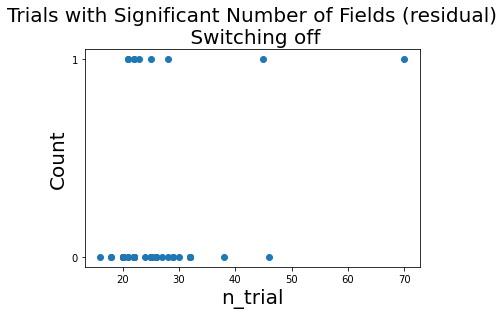

In [115]:
reload(cppa)
from matplotlib.ticker import MaxNLocator
n_sig_trial_meta_df_resid_d = {}
for onoff_str in ['on','off']:
    for meta_key in ['n_pyr','n_trial']:
        fig,ax,n_sig_trial_meta_df_resid_d[onoff_str]=cppa.plot_n_sig_trials_and_meta_data(switch_detection_res_allsess_resid,db_sorted,meta_key,onoff_str=onoff_str,detection='avg',n_sig_trial_meta_df=None,sw_ind=(0.4,'switch_magnitude',0.3),
                                        fig=None,ax=None,split_trialtype=False
        )
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set(xlabel=meta_key,title=f'Trials with Significant Number of Fields (residual)\n Switching {onoff_str}',ylabel='Count')

        fig=ax.figure
        fig.savefig(os.path.join(figdir,f'resid_n_sig_trial_per_sess_vs_{meta_key}_{onoff_str}.pdf'),bbox_inches='tight')
    
    

In [43]:
data_resid_sig_trial_d = {}
for onoff_str in ['on','off']:
    sw_ind = (onoff_str,0.4,'switch_magnitude',0.3)
    data_resid_sig_trial_d[onoff_str] = pd.concat({'data':n_sig_trial_meta_df_d[onoff_str][sw_ind],'resid':n_sig_trial_meta_df_resid_d[onoff_str][sw_ind]},axis=1)
    
    

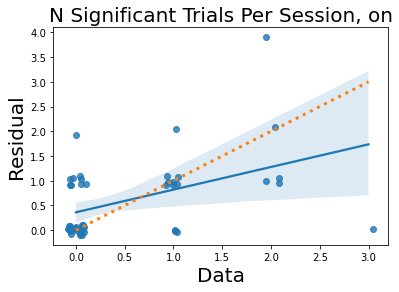

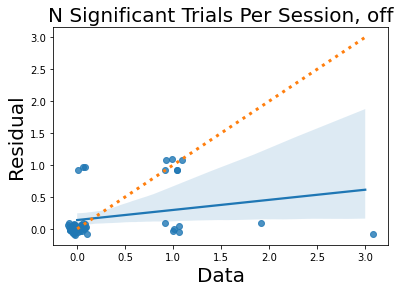

In [114]:
for onoff_str in ['on','off']:
    plt.figure()
    ax=sns.regplot(data=data_resid_sig_trial_d[onoff_str],x_jitter=0.1,y_jitter=0.1,x='data',y='resid')
    ax.plot([0,3],[0,3],linestyle=':',linewidth=3)

    ax.set(title=f'N Significant Trials Per Session, {onoff_str}',ylabel='Residual',xlabel='Data')
    fig=ax.figure
    fig.savefig(os.path.join(figdir,f'n_sig_trial_per_sess_resid_vs_data_{onoff_str}.pdf'),bbox_inches='tight')
